In [1]:
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cmocean
import oceans
import csv
import gsw
%matplotlib inline 

/anaconda/lib/python3.6/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
#interpolate the data onto the standard depth grid given by x_int
def interpolate(x_int, xvals, yvals):
    yvals_int = []
    for n in range(0, len(yvals)):
        yvals_int.append(np.interp(x_int, xvals[n, :], yvals[n, :]))
    #convert the interpolated data from a list to numpy array
    return np.asarray(yvals_int)

In [3]:
float_id = '12700' # '9094'
fd = xr.open_mfdataset('SOCCOM_LoResQC_LIAR_28Sep2019_netcdf/' + float_id + 'SOOCNQC.nc')

In [4]:
zi = np.arange(0, 1600, 5)
oxy_int = np.array(interpolate(zi, fd.Pressure[:, ::-1], fd.Oxygen[:, ::-1]))
temp_int = np.array(interpolate(zi, fd.Pressure[:, ::-1], fd.Temperature[:, ::-1]))
sal_int = np.array(interpolate(zi, fd.Pressure[:, ::-1], fd.Salinity[:, ::-1]))

(0, 25)

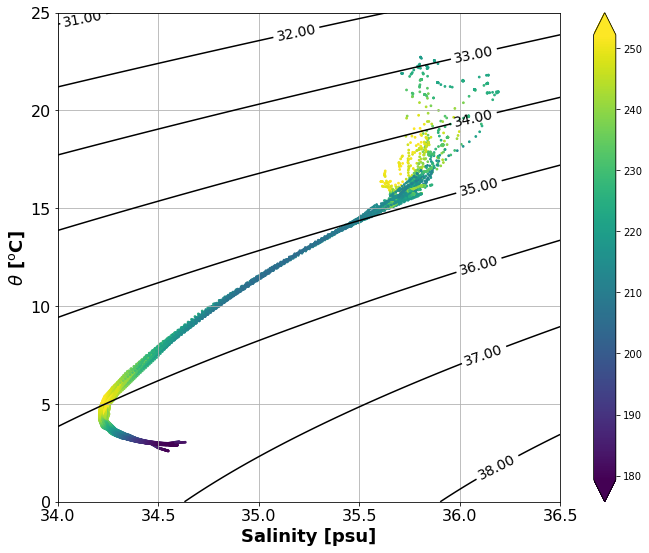

In [5]:
from matplotlib import cm
import matplotlib.pylab as pl

fig,ax=plt.subplots()
fig.set_size_inches(10,9)

for i in range(len(oxy_int)):
    sc=ax.scatter(sal_int[i,:],temp_int[i,:],c=oxy_int[i,:],s=3)

s_grid, t_grid = np.meshgrid(
    np.linspace(34,36.5,100),
    np.linspace(0,25,100)
)

pref = 2000
dens_grid = gsw.rho(s_grid.ravel(), t_grid.ravel(), pref).reshape(s_grid.shape)-1000

con = plt.contour(s_grid, t_grid, dens_grid, colors='k')
plt.clabel(con, fmt='%4.2f',fontsize=14)
plt.xlabel('Salinity [psu]',fontsize=18,fontweight='bold')
plt.ylabel('$\\theta$ [$^{\mathrm{o}}$C]',fontsize=18,fontweight='bold')
plt.tick_params(axis='both', labelsize=16)
plt.colorbar(sc,fraction=0.04, pad=0.06,extend='both')
plt.grid(True)
plt.xlim([34,36.5])
plt.ylim([0,25])